In [1]:
#project : sales prédiction, avec une série temporelle (arima, je tenterai aussi prophet)
# en utilisant le jeu de données shampoo sales, dispo sur kaggle


#installation des librairies

!pip install pmdarima

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas import DataFrame
import os

from statsmodels.tsa.stattools import adfuller
from pmdarima import auto_arima
from pandas.plotting import autocorrelation_plot

from sklearn.metrics import mean_squared_error
from math import sqrt

from statsmodels.tsa.arima.model import ARIMA

In [2]:
#chargement des données

df = pd.read_csv("shampoo_sales.csv")

In [3]:
df.head(26)

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [4]:
#dimensions du jeu de données
df.shape

(36, 2)

In [5]:
#c'est une très petite série temporelle
#il ne faut pas en espérer autre chsoe qu'un projet de démonstration
#nous ne pousserons pas l'optimisation trop loin, nous allons même rester basique.

In [6]:
#les nuls et les nans 
df.isnull().sum()
df.isna().sum()

Month    0
Sales    0
dtype: int64

In [7]:
#aucune donnée manquante

In [8]:
#transformation de la date

df['Temp_date'] = 0

initial_year = 2019
counter = 0

for indx,row in df.iterrows():
    #print(indx)
    if counter < 12 :
        year = initial_year
    elif counter >=12 and counter <24:
        year = initial_year + 1
    elif counter >=24:
        year = initial_year + 2
    df['Temp_date'].iloc[indx] = str(year) + "-" + df['Month'].iloc[indx][2:]
    counter += 1
    
#réaffectation des dates à la colonne month    
df['Month'] = df['Temp_date']
df.drop(columns = 'Temp_date', inplace = True)

#ajout du jour pour avoir un format de date type aaaa-mm-dd
df['Month'] = df['Month'] + "-" + "01"
df = df[0:36]

C:\Users\rchaz\AppData\Local\Temp\ipykernel_22756\2810577018.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Temp_date'].iloc[indx] = str(year) + "-" + df['Month'].iloc[indx][2:]


In [9]:
df.head(36)
dataframe_saved = df

In [10]:
dataframe_saved.head(36)

,Month,Sales
0,2019-01-01,266.0
1,2019-02-01,145.9
2,2019-03-01,183.1
3,2019-04-01,119.3
4,2019-05-01,180.3
5,2019-06-01,168.5
6,2019-07-01,231.8
7,2019-08-01,224.5
8,2019-09-01,192.8
9,2019-10-01,122.9


In [11]:
#assigner la colonne month aux index, garder sales en variable
df= df.set_index(['Month'])
df = df.rename({'Sales of shampoo over a three year period': 'Sales'}, axis=1)

In [12]:
df.head(36)

,Sales
Month,
2019-01-01,266.0
2019-02-01,145.9
2019-03-01,183.1
2019-04-01,119.3
2019-05-01,180.3
2019-06-01,168.5
2019-07-01,231.8
2019-08-01,224.5
2019-09-01,192.8


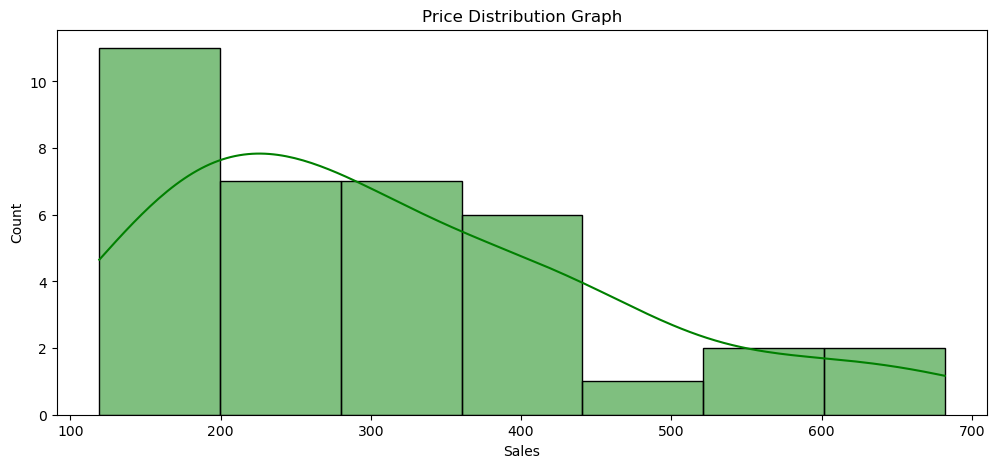

In [13]:
#distrbution des ventes
plt.figure(figsize=(12,5))
plt.title("Price Distribution Graph")
ax = sns.histplot(df["Sales"], color = 'green', kde=True)

In [14]:
#analyse temporelle : ARIMA

In [15]:
#test statistique

#notre objectif est de voir si les données suivent un schéma, type fréquente temps dépendante.
#nous devons pour cela évaluer la stationarité : si oui, variance et moyenne sont constantes.

#si p value < 0.05, les données sont stationnaires
#si p value > 0.05, elles ne le sont pas


def ad_test(dataset):
    
    dftest = adfuller(dataset, autolag = 'AIC')
    
    print("1. ADF : ",dftest[0])
    print("2. P-Value : ", dftest[1])
    print("3. Num Of Lags : ", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:",dftest[3])
    print("5. Critical Values :")
    for key, val in dftest[4].items():
         print("\t",key, ": ", val)
         
         
ad_test(df['Sales'])

1. ADF :  3.0601420836411815
2. P-Value :  1.0
3. Num Of Lags :  10
4. Num Of Observations Used For ADF Regression: 25
5. Critical Values :
	 1% :  -3.7238633119999998
	 5% :  -2.98648896
	 10% :  -2.6328004


In [16]:
#Les données ne sont pas stationnaires, ce qui est un problème pour une analyse temporelle.
# Pour les transformer en données stationnaires, nous devons calculer la “d” value de l'ARIMA

In [17]:
'''
Lors de la création du modèle ARIMA, trois paramètres sont donnés, respectivement : p, d et q.

p : Indique combien d'étapes à l'avenir les valeurs à un moment donné x(t) seront prises en compte dans le processus d'estimation.
q : Indique combien d'étapes auparavant l'erreur d'estimation à x(t) sera soumise à une moyenne mobile avec des valeurs.
d : Degré de différence nécessaire pour rendre les données stationnaires.

En gros, il utilise quelque chose appelé le score AIC (Critère d'Information d'Akaike)
 pour déterminer à quel point un modèle de prédiction particulier est performant avec la fonction auto_arima.
 Elle cherche uniquement à minimiser le score AIC.
'''

stepwise_fit = auto_arima(df['Sales'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=430.873, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=405.977, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=408.967, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=429.229, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=403.573, Time=0.03 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=404.633, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=404.226, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=402.407, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=401.463, Time=0.08 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec

Best 

In [18]:
#ARIMA meilleurs parametres (1,1,2)

In [19]:
#séparation du jeu de données en train et test : 70% dans le train, 30% dans le test
#l'idée est de mettre les 30% de données avec els dates les plus récentes dans le jeu de test.
#on entrainera le modèle avec les 7% de données les plus anciennes.

X = df.values
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

In [20]:
#Arima : entrainement

for t in range(len(test)):
    model = ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

predicted=341.015454, expected=440.400000
predicted=341.819704, expected=315.900000
predicted=391.521274, expected=439.300000
predicted=339.753099, expected=401.300000
predicted=424.993908, expected=437.400000
predicted=387.268987, expected=575.500000
predicted=468.852028, expected=407.600000
predicted=503.761977, expected=682.000000
predicted=460.691662, expected=475.300000
predicted=613.988012, expected=581.300000
predicted=521.714870, expected=646.900000


In [21]:
#test, et calcul de la RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#Test RMSE: 90.986

Test RMSE: 97.551


In [22]:
#que veux dire cette valeur de RMSE ? elle me semble assez importante...

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


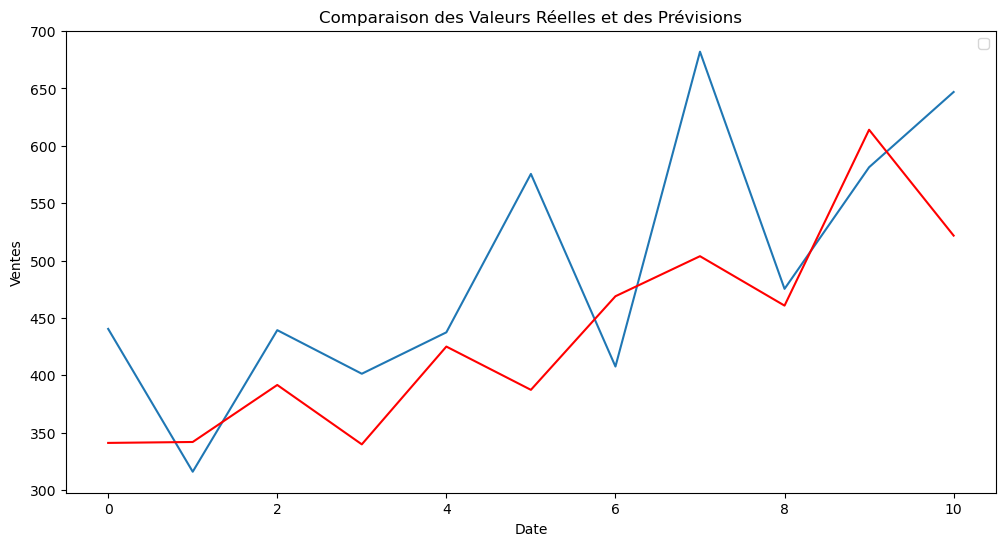

In [42]:
#traçons le test et la prédiction, afin de comprendre ce qu'il se passe
plt.figure(figsize=(12, 6))
pyplot.plot(test)
pyplot.plot(predictions, color='red')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison des Valeurs Réelles et des Prévisions')
plt.legend()
plt.show()



In [24]:
#il y a un gros écart entre le test et la prédiction, d'où cette valeur de RMSE élevée.
#l'arima ne permet d'avoir une prédiction satisfaisante

In [25]:
#voyons ce qu'on peut faire avec la librairie prophet

In [26]:
#installons la librarie prophet
%pip install prophet
from prophet import Prophet




Note: you may need to restart the kernel to use updated packages.


In [27]:
# Charger votre dataframe de données préparées
# Assurez-vous qu'il contient deux colonnes : 'ds' pour les dates et 'y' pour les valeurs de ventes.
# Par exemple, df = pd.read_csv('votre_dataframe.csv')

#prophet est sensible à la casse, renomage des colonnes en minuscules
# Renommer les colonnes en minuscules si elles ne le sont pas déjà
dataframe_saved_renamed = dataframe_saved.rename(columns={'Month': 'ds', 'Sales': 'y'})

dataframe_saved_renamed.head()

,ds,y
0,2019-01-01,266.0
1,2019-02-01,145.9
2,2019-03-01,183.1
3,2019-04-01,119.3
4,2019-05-01,180.3


In [28]:
# Diviser les données en train (70%) et test (30%)
train_size = int(0.7 * len(dataframe_saved_renamed))
train_data = dataframe_saved_renamed[:train_size]
test_data = dataframe_saved_renamed[train_size:]

In [29]:
# Créer un modèle Prophet
model = Prophet()

# Entraîner le modèle sur les données d'entraînement
model.fit(train_data)

# Prévoir les ventes futures pour l'ensemble de test
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

16:02:41 - cmdstanpy - INFO - Chain [1] start processing
16:02:52 - cmdstanpy - INFO - Chain [1] done processing


ConversionError: Failed to convert value(s) to axis units: array([datetime.datetime(2019, 1, 1, 0, 0),
       datetime.datetime(2019, 2, 1, 0, 0),
       datetime.datetime(2019, 3, 1, 0, 0),
       datetime.datetime(2019, 4, 1, 0, 0),
       datetime.datetime(2019, 5, 1, 0, 0),
       datetime.datetime(2019, 6, 1, 0, 0),
       datetime.datetime(2019, 7, 1, 0, 0),
       datetime.datetime(2019, 8, 1, 0, 0),
       datetime.datetime(2019, 9, 1, 0, 0),
       datetime.datetime(2019, 10, 1, 0, 0),
       datetime.datetime(2019, 11, 1, 0, 0),
       datetime.datetime(2019, 12, 1, 0, 0),
       datetime.datetime(2020, 1, 1, 0, 0),
       datetime.datetime(2020, 2, 1, 0, 0),
       datetime.datetime(2020, 3, 1, 0, 0),
       datetime.datetime(2020, 4, 1, 0, 0),
       datetime.datetime(2020, 5, 1, 0, 0),
       datetime.datetime(2020, 6, 1, 0, 0),
       datetime.datetime(2020, 7, 1, 0, 0),
       datetime.datetime(2020, 8, 1, 0, 0),
       datetime.datetime(2020, 9, 1, 0, 0),
       datetime.datetime(2020, 10, 1, 0, 0),
       datetime.datetime(2020, 11, 1, 0, 0),
       datetime.datetime(2020, 12, 1, 0, 0),
       datetime.datetime(2021, 1, 1, 0, 0)], dtype=object)

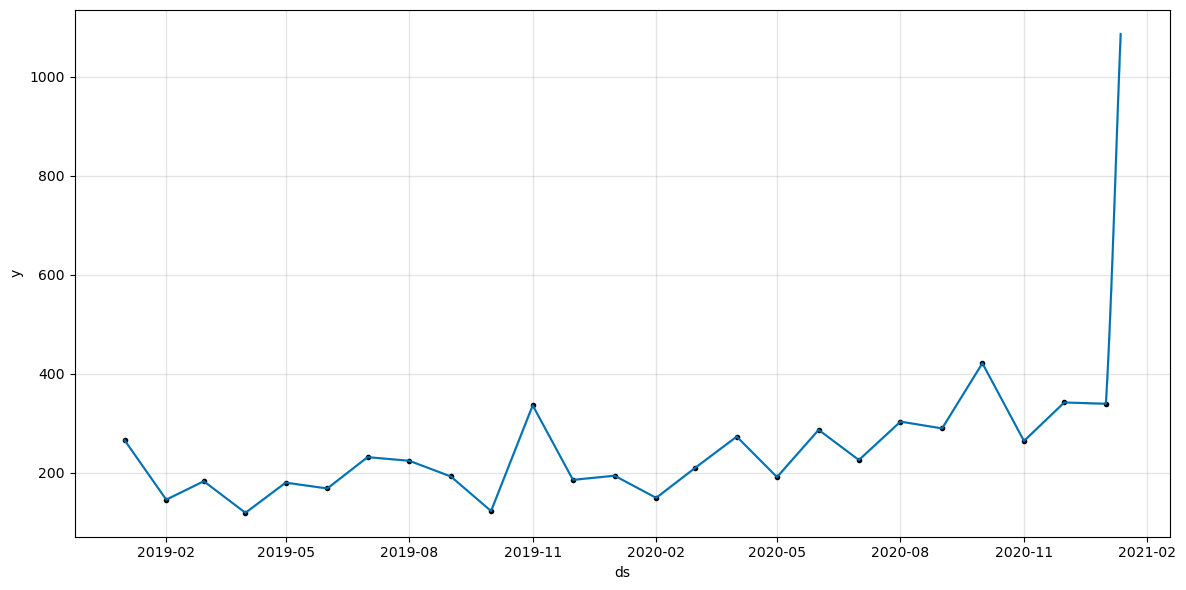

In [30]:
# Afficher les prévisions et les valeurs réelles
fig, ax = plt.subplots(figsize=(12, 6))
model.plot(forecast, ax=ax)
plt.plot(test_data['ds'], test_data['y'], 'r', label='Valeurs Réelles')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Prévisions de Ventes avec Prophet')
plt.show()



In [31]:
# Calculer et afficher les métriques d'évaluation (par exemple, RMSE ou MAE)
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_true = test_data['y']
y_pred = forecast['yhat'][-len(test_data):]
rmse = mean_squared_error(y_true, y_pred, squared=False)
mae = mean_absolute_error(y_true, y_pred)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 285.99803372250125
MAE: 243.17168175995013


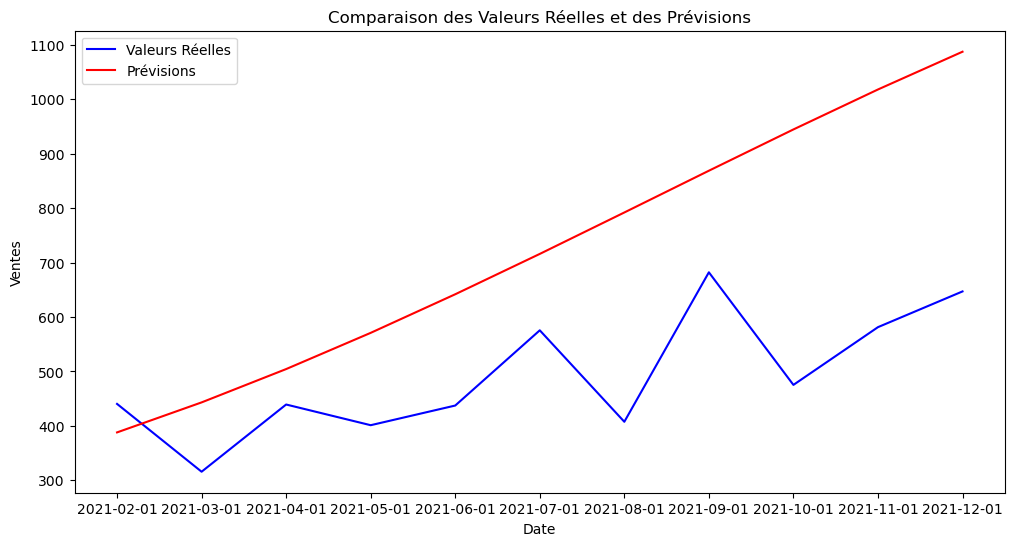

In [41]:
# Extraire les valeurs réelles et prédites
y_true = test_data['y']
y_pred = forecast['yhat'][-len(test_data):]

# Créer un graphique pour comparer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(test_data['ds'], y_true, label='Valeurs Réelles', color='blue')
plt.plot(test_data['ds'], y_pred, label='Prévisions', color='red')
plt.xlabel('Date')
plt.ylabel('Ventes')
plt.title('Comparaison des Valeurs Réelles et des Prévisions')
plt.legend()
plt.show()

In [ ]:
#ok, je comprend mieux les valeurs de RMSE et MAE catastrophiques.

In [ ]:
#ceci conclut notre petit projet sur la prévision de ventes avec des algos de séries temporelles.